## Outliers

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [9]:
# Iterating the columns and removing blank spaces

for c in life.columns:
    life.rename(columns={c:c.replace(' ','_')},inplace=True)

In [10]:
#Creating the function to clean with imputation based on year.

import math

def general_imputation_year(columns):
        
    """ Function: general_imputation based on a year and country
        Parameters: a list of columns to clean
        Return: string
    """     
    
    years = life['Year'].unique()
    countries = life['Country'].unique()
    
    for column_name in columns:

        new_column = column_name + '_n'
        #life[new_column] = life[column_name]
        
        for year in years:
            for country in countries:
                
                m=life[(life['Year']==year) & (life['Country']==country)][[column_name,'Year']].mean()
                mean = m.astype('float')

                group = (life['Year']==year)

                if math.isnan(mean[0]):            
                    mean_r = life[column_name].mean()

                else:
                    mean_r = life[(life['Year']==year) & (life['Country']==country)][column_name].mean()


                life.loc[group,column_name] = life.loc[group,column_name].fillna(mean_r)

                
    return 'Done'



In [11]:
general_imputation_year(['Hepatitis_B','GDP','Population','Alcohol','Income_composition_of_resources','Schooling','Total_expenditure'])

# we drop the null values after interpolation
life.dropna(inplace=True)

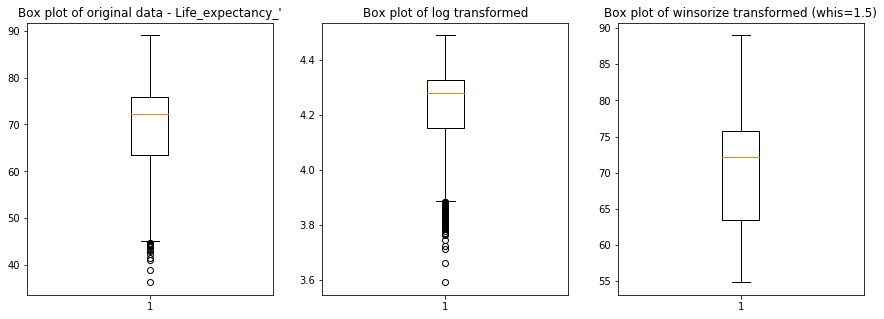

Winsorize Transformation


In [12]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Life_expectancy_'])
plt.title("Box plot of original data - Life_expectancy_'")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Life_expectancy_']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Life_expectancy_'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()



print('Winsorize Transformation')

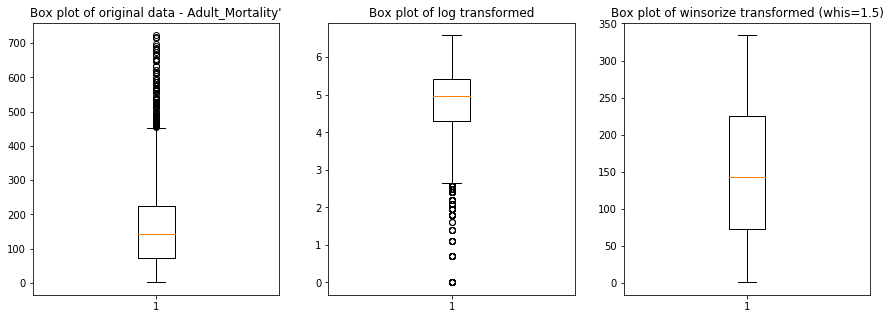

Winsorize Transformation


In [13]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Adult_Mortality'])
plt.title("Box plot of original data - Adult_Mortality'")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Adult_Mortality']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Adult_Mortality'], (0, 0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()

print('Winsorize Transformation')


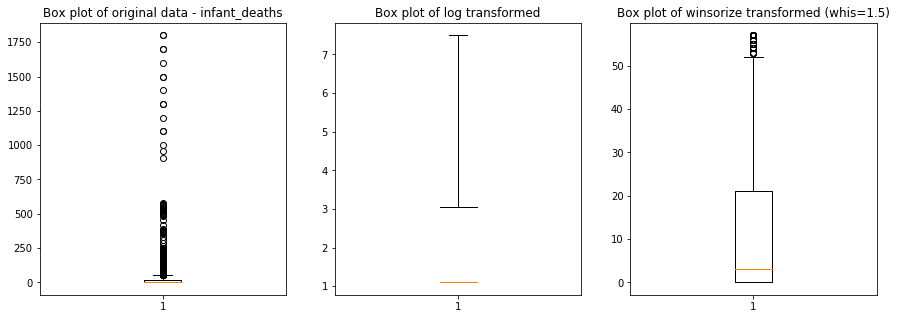

Winsorize Transformation


In [14]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['infant_deaths'])
plt.title("Box plot of original data - infant_deaths")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['infant_deaths']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['infant_deaths'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()

print('Winsorize Transformation')

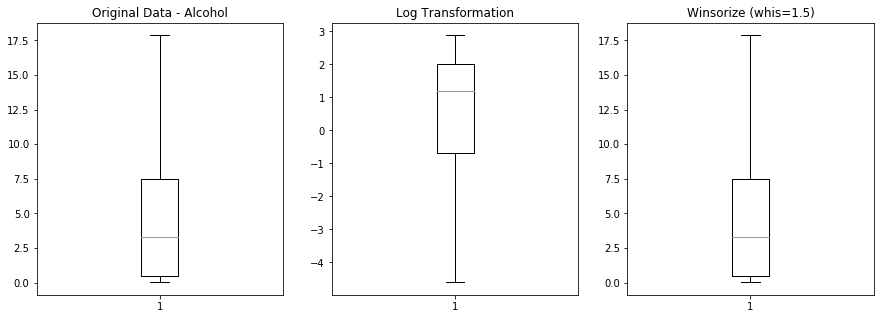

Winsorize Transformation


In [15]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life["Alcohol"])
plt.title("Original Data - Alcohol")

plt.subplot(1,3,2)
plt.boxplot(np.log(life["Alcohol"]))
plt.title("Log Transformation")

plt.subplot(1,3,3)
plt.boxplot(winsorize(life["Alcohol"], (0.10, 0)))
plt.title("Winsorize (whis=1.5)")
plt.show()
print('Winsorize Transformation')

In [16]:
#life[['Country','Year','infant_deaths']].groupby(['Country','Year']).sum()

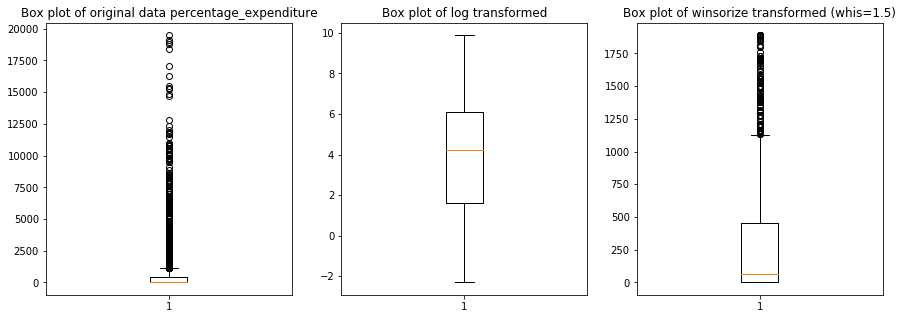

LOG Transformation


In [17]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['percentage_expenditure'])
plt.title("Box plot of original data percentage_expenditure")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['percentage_expenditure']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['percentage_expenditure'], (0, 0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('LOG Transformation')

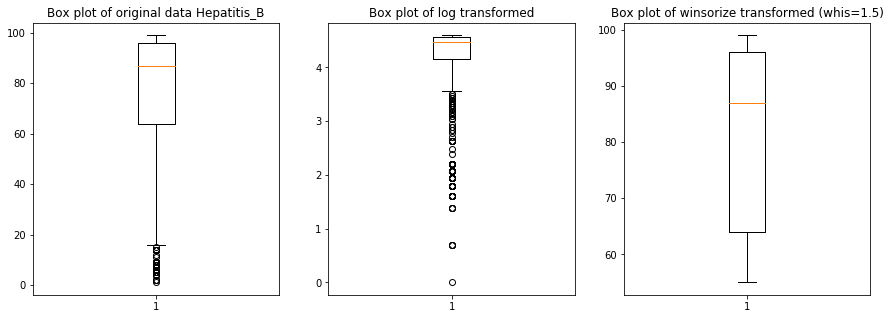

Winsorize Transformation


In [18]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Hepatitis_B'])
plt.title("Box plot of original data Hepatitis_B")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Hepatitis_B']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Hepatitis_B'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

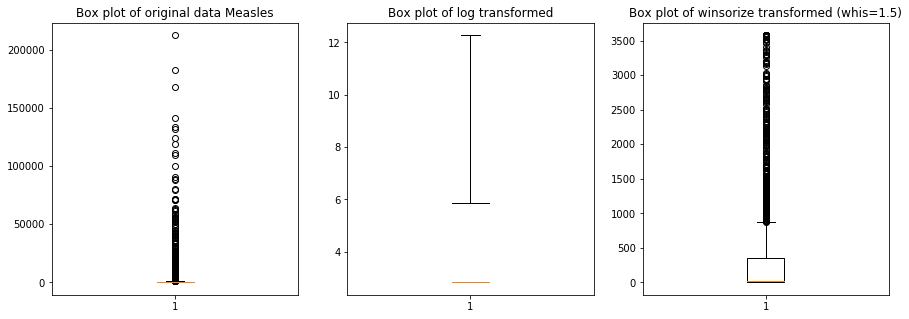

Winsorize Transformation


In [19]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Measles_'])
plt.title("Box plot of original data Measles")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Measles_']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Measles_'], (0, 0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

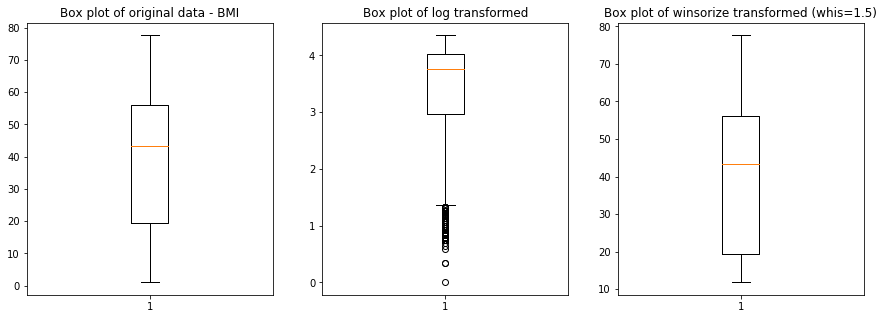

NO OUTLIERS


In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['_BMI_'])
plt.title("Box plot of original data - BMI")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['_BMI_']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['_BMI_'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()

print('NO OUTLIERS')

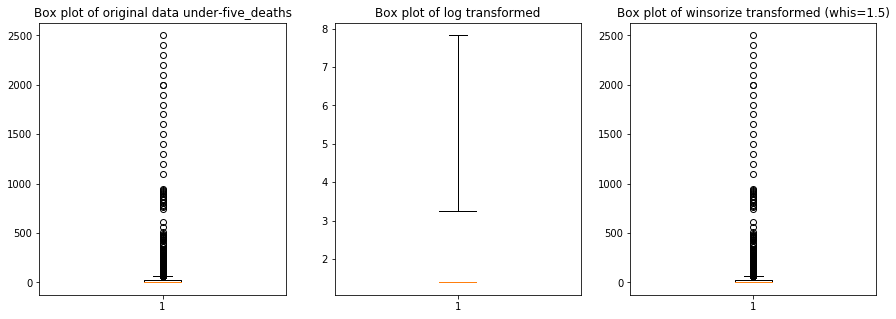

Winsorize Transformation


In [21]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['under-five_deaths_'])
plt.title("Box plot of original data under-five_deaths")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['under-five_deaths_']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['under-five_deaths_'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

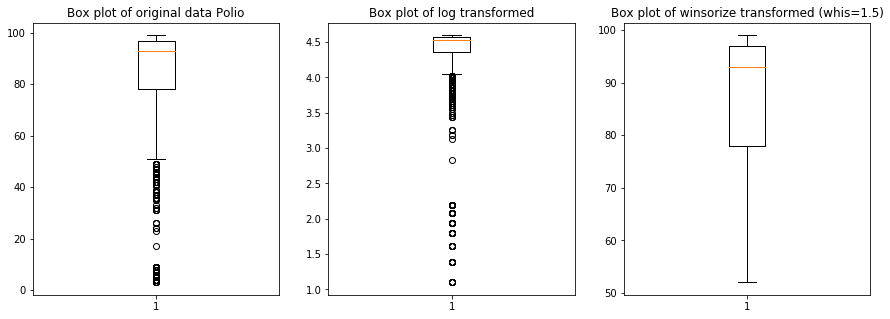

Winsorize Transformation


In [22]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Polio'])
plt.title("Box plot of original data Polio")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Polio']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Polio'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

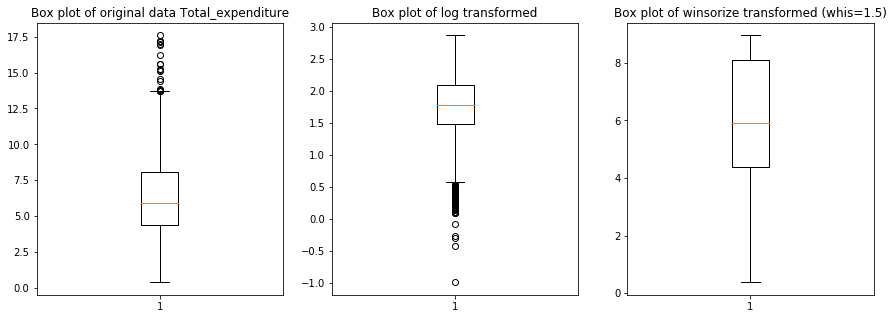

Winsorize Transformation


In [23]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Total_expenditure'])
plt.title("Box plot of original data Total_expenditure")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Total_expenditure']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Total_expenditure'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

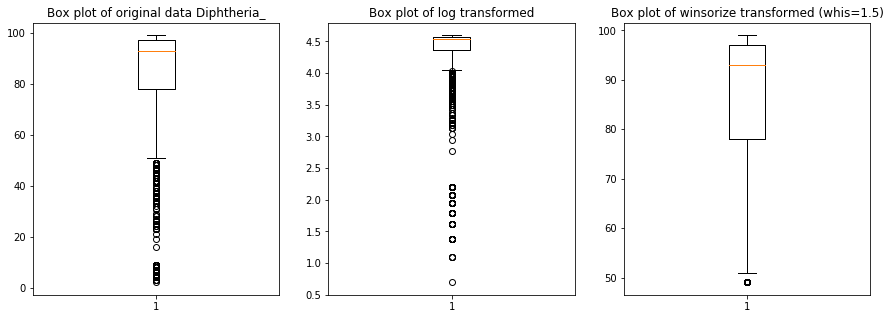

Winsorize Transformation


In [24]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Diphtheria_'])
plt.title("Box plot of original data Diphtheria_")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Diphtheria_']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Diphtheria_'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

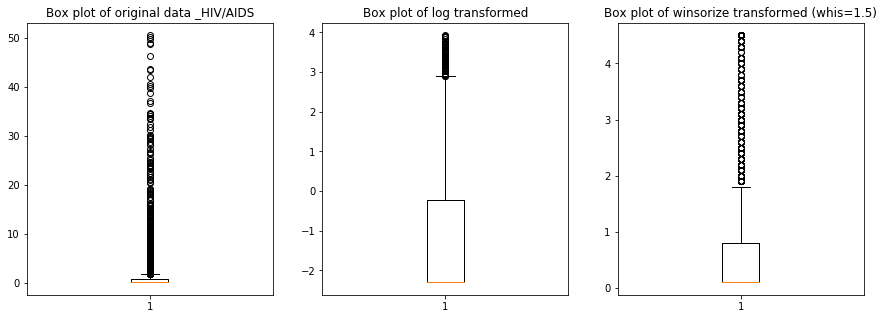

Winsorize Transformation


In [25]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['_HIV/AIDS'])
plt.title("Box plot of original data _HIV/AIDS")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['_HIV/AIDS']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['_HIV/AIDS'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

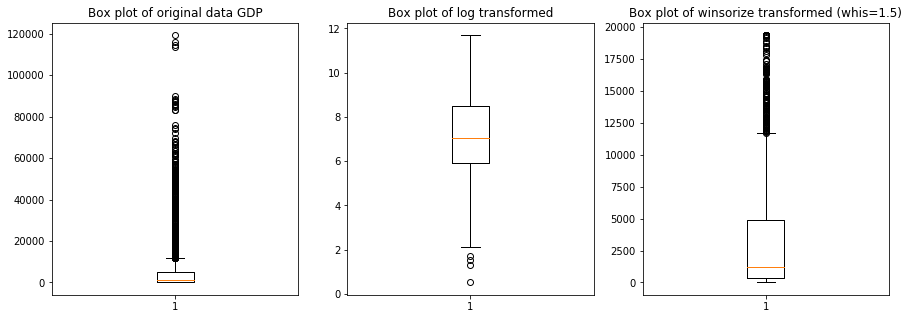

Log Transformation


In [26]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['GDP'])
plt.title("Box plot of original data GDP")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['GDP']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['GDP'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Log Transformation')

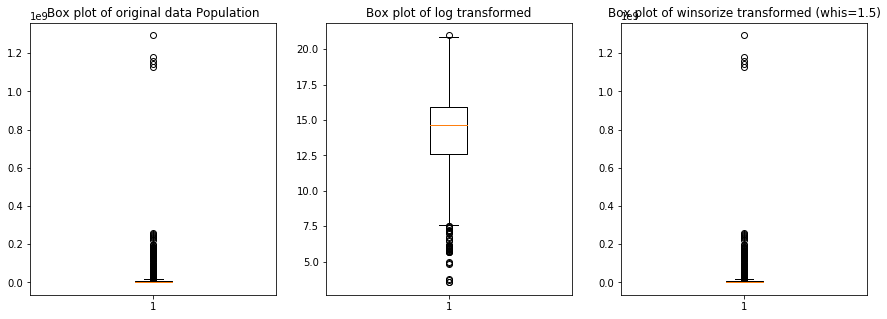

Winsorize Transformation


In [27]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Population'])
plt.title("Box plot of original data Population")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Population']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Population'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

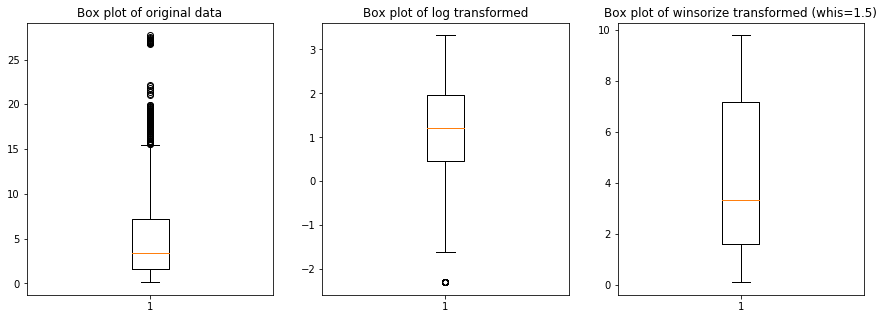

Winsorize Transformation


In [28]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['_thinness__1-19_years'])
plt.title("Box plot of original data")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['_thinness__1-19_years']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['_thinness__1-19_years'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

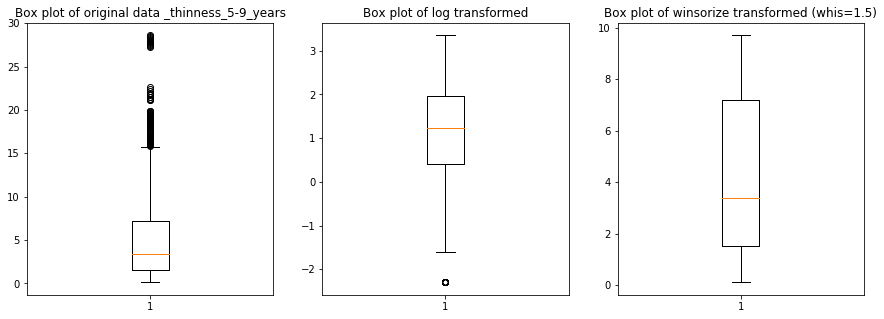

Winsorize Transformation


In [29]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['_thinness_5-9_years'])
plt.title("Box plot of original data _thinness_5-9_years")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['_thinness_5-9_years']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['_thinness_5-9_years'], (0,0.10)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

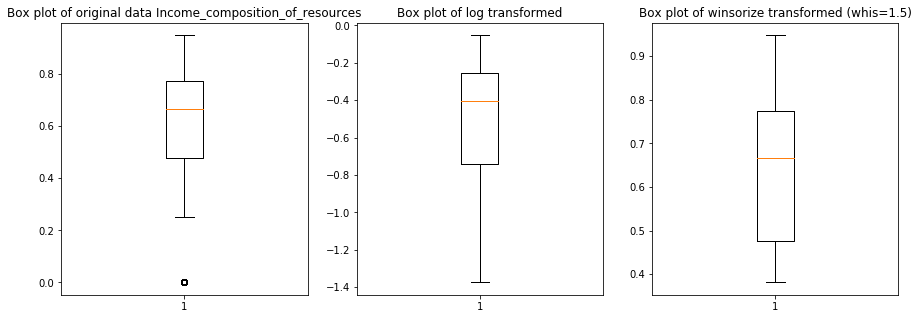

Winsorize Transformation


In [30]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Income_composition_of_resources'])
plt.title("Box plot of original data Income_composition_of_resources")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Income_composition_of_resources']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Income_composition_of_resources'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

In [31]:
winsorize(life['Income_composition_of_resources'].describe()

SyntaxError: unexpected EOF while parsing (<ipython-input-31-7046a2b88d21>, line 1)

In [ ]:

plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(life['Schooling'])
plt.title("Box plot of original data Schooling")

plt.subplot(1,3,2)
plt.boxplot(np.log(life['Schooling']))
plt.title("Box plot of log transformed")


plt.subplot(1,3,3)
plt.boxplot(winsorize(life['Schooling'], (0.10, 0)))
plt.title("Box plot of winsorize transformed (whis=1.5)")
plt.show()
print('Winsorize Transformation')

Based on visualizations above, these are the results/techniques to handle outliers:

- Country
- Year
- Status
- Life_expectancy_ - Winsorize Transformation

- Adult_Mortality - Winsorize Transformation
- infant_deaths - Winsorize Transformation
- Alcohol - Winsorize Transformation
- percentage_expenditure - Log Transformation
- Hepatitis_B - Winsorize Transformation
- Measles_ = Winsorize Transformation
- BMI - NO OUTLIERS
- under-five_deaths_ - Winsorize Transformation
- Polio - Winsorize Transformation
- Total_expenditure. - Winsorize Transformation
- Diphtheria_ - Winsorize Transformation
- HIV/AIDS - Winsorize Transformation
- GDP - Log Transformation
- Population - Winsorize Transformation
- _thinness__1-19_years - Winsorize Transformation
- _thinness_5-9_years - Winsorize Transformation
- Income_composition_of_resources - Winsorize Transformation
- Schooling - Winsorize Transformation